In [3]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [4]:
df.to_csv('module_5_auto.csv')

In [5]:
df=df._get_numeric_data()
df.head(10)

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1
5,5,5,2,122,99.8,0.851994,0.920833,53.1,2507,136,...,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,0,1
6,6,6,1,158,105.8,0.925997,0.991667,55.7,2844,136,...,3.40,8.5,110.0,5500.0,19,25,17710.0,12.368421,0,1
7,7,7,1,122,105.8,0.925997,0.991667,55.7,2954,136,...,3.40,8.5,110.0,5500.0,19,25,18920.0,12.368421,0,1
8,8,8,1,158,105.8,0.925997,0.991667,55.9,3086,131,...,3.40,8.3,140.0,5500.0,17,20,23875.0,13.823529,0,1
9,9,9,2,192,101.2,0.849592,0.900000,54.3,2395,108,...,2.80,8.8,101.0,5800.0,23,29,16430.0,10.217391,0,1


In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [9]:
y_data=df['price']
x_data=df.drop('price',axis=1)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.10,random_state=1)

print('Number of test samples:',x_test.shape[0])
print('Number of training samples:',x_train.shape[0])

Number of test samples: 21
Number of training samples: 180


In [11]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_data,y_data,test_size=0.40,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lre=LinearRegression()

In [14]:
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [15]:
lre.score(x_test[['horsepower']],y_test)

0.3635875575078824

In [16]:
lre.score(x_train[['horsepower']],y_train)

0.6619724197515103

In [17]:
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
Rcross=cross_val_score(lre,x_data[['horsepower']],y_data,cv=4)

In [20]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [21]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [22]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [23]:
Rc=cross_val_score(lre,x_data[['horsepower']],y_data,cv=2)

In [24]:
Rc.mean()

0.5166761697127429

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
yhat=cross_val_predict(lre,x_data[['horsepower']],y_data,cv=4)

In [27]:
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [28]:
lr=LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)

LinearRegression()

In [29]:
yhat_train=lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [30]:
yhat_test=lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


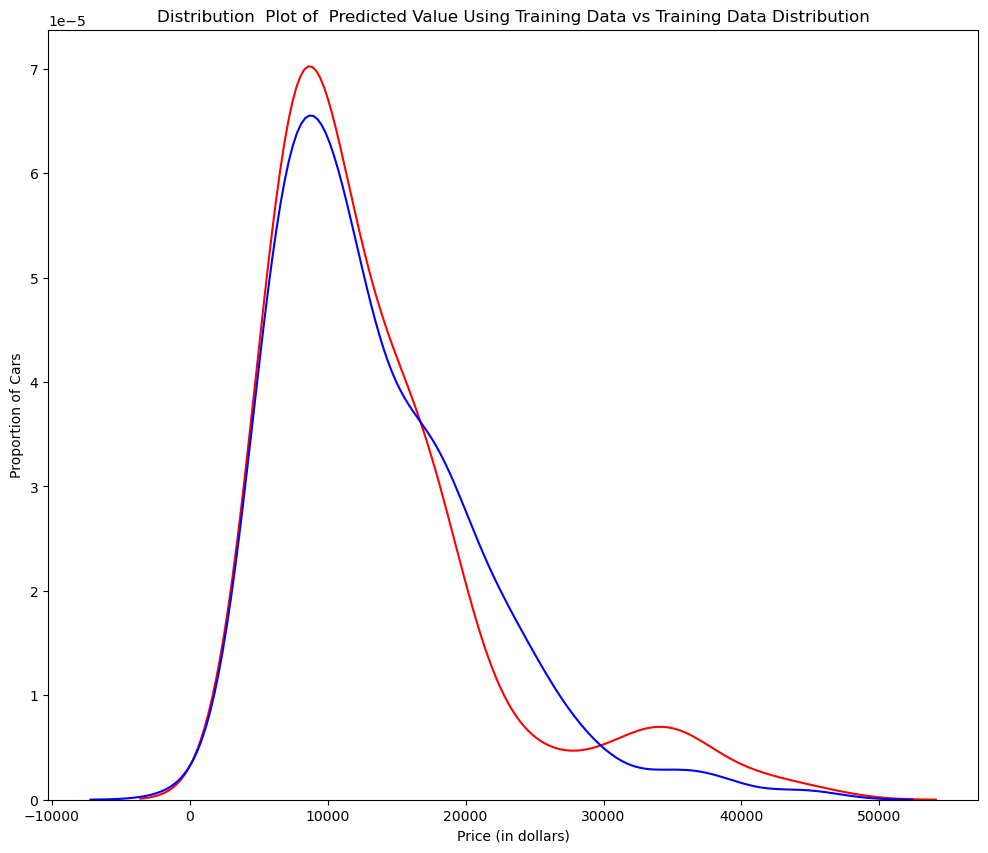

In [32]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


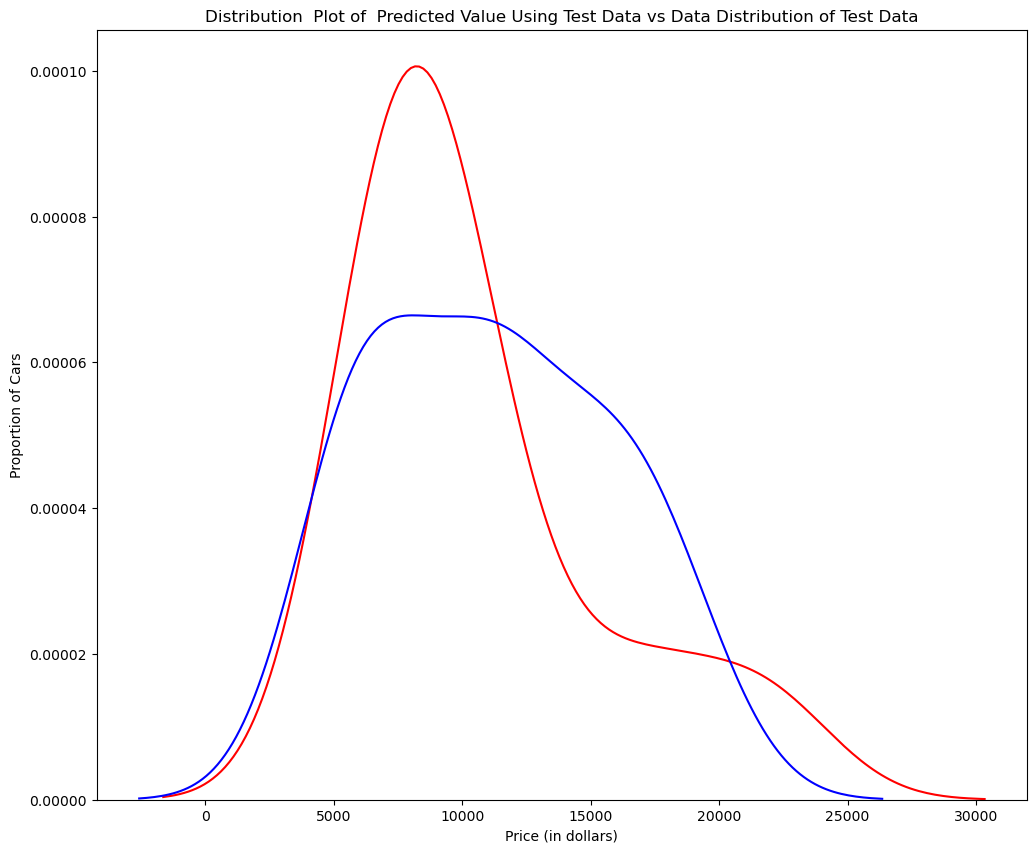

In [33]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.45,random_state=0)

In [36]:
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [37]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [38]:
yhat=poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77398588,  7308.09645243, 12213.83838471, 18893.06442958,
       19995.73527172])

In [39]:
print('Predicted values:',yhat[0:4])
print('Actual values:',y_test[0:4].values)

Predicted values: [ 6728.77398588  7308.09645243 12213.83838471 18893.06442958]
Actual values: [ 6295. 10698. 13860. 13499.]


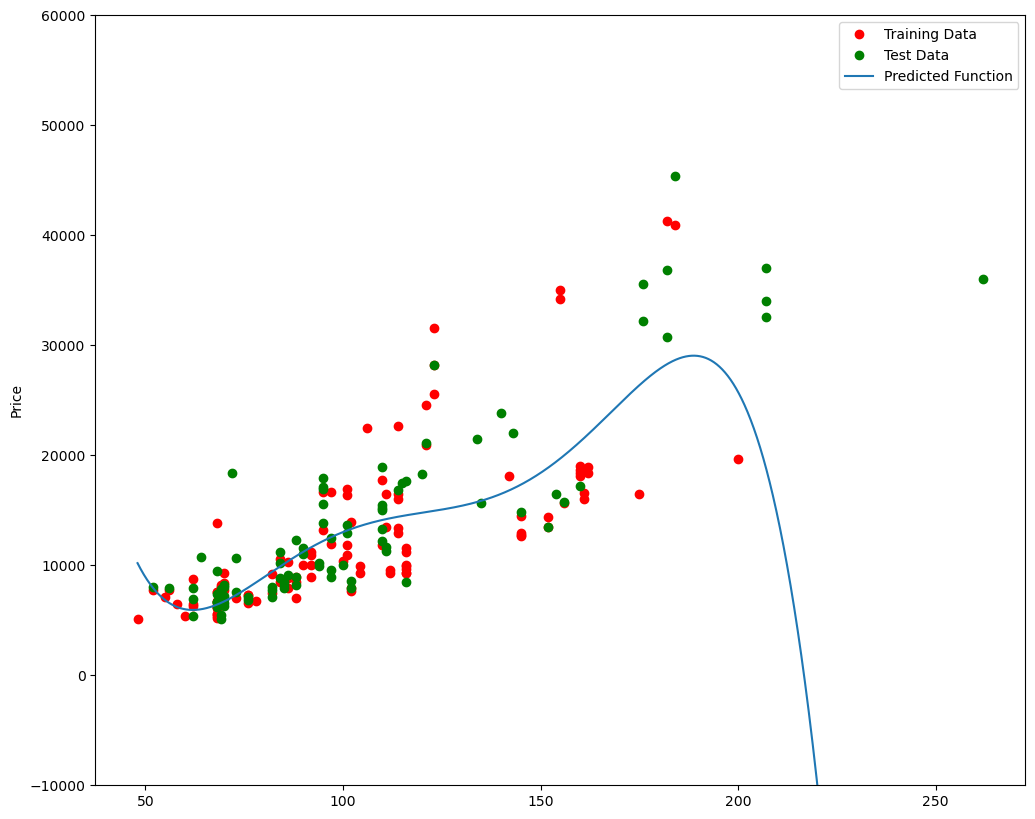

In [40]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [41]:
poly.score(x_train_pr,y_train)

0.5567716899895466

In [42]:
poly.score(x_test_pr,y_test)

-29.871832579392006

Text(3, 0.75, 'Maximum R^2 ')

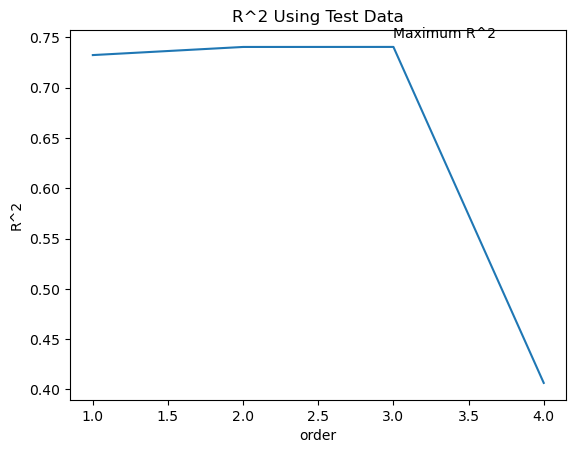

In [43]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [44]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [45]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [46]:
pr1=PolynomialFeatures(degree=2)

In [47]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [48]:
x_train_pr1.shape

(110, 15)

In [49]:
poly1=LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

In [50]:
yhat_test1=poly1.predict(x_test_pr1)

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


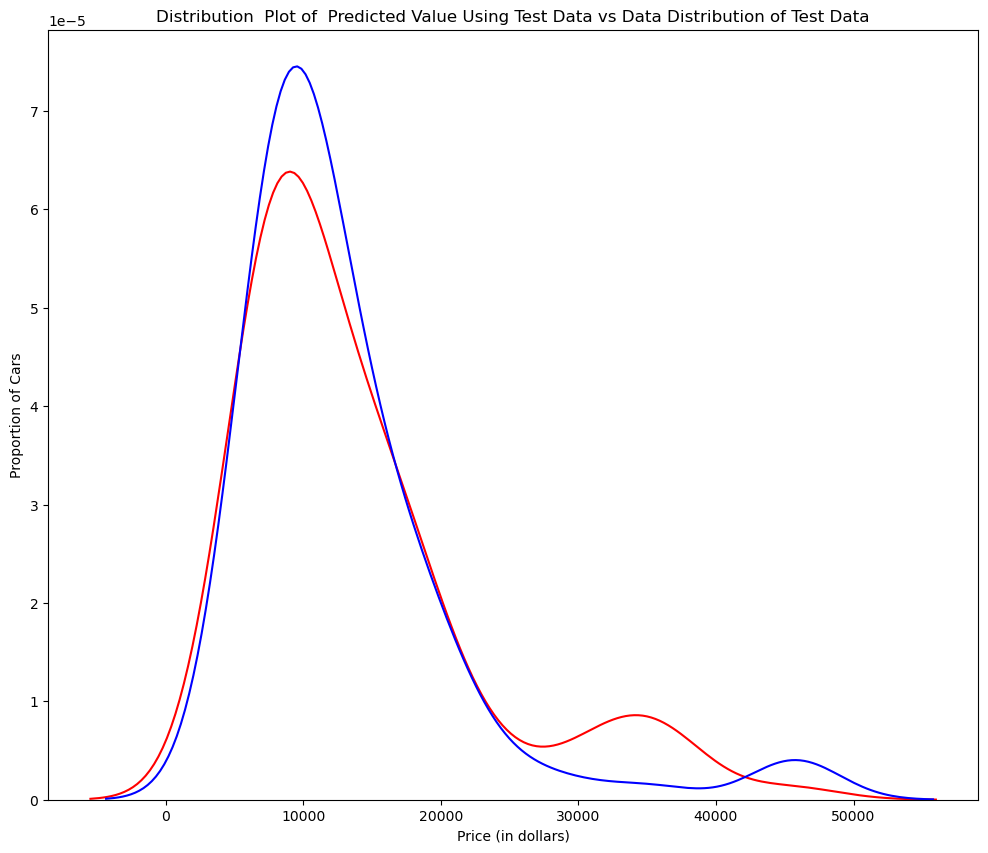

In [51]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [52]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [53]:
from sklearn.linear_model import Ridge

In [54]:
RidgeModel=Ridge(alpha=0.1)

In [55]:
RidgeModel.fit(x_train_pr,y_train)

C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=0.1)

In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6728.77398588  7308.09645243 12213.83838471 18893.06442958]
test set : [ 6295. 10698. 13860. 13499.]


In [57]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 243.38it/s, Test Score=0.564, Train Score=0.859]


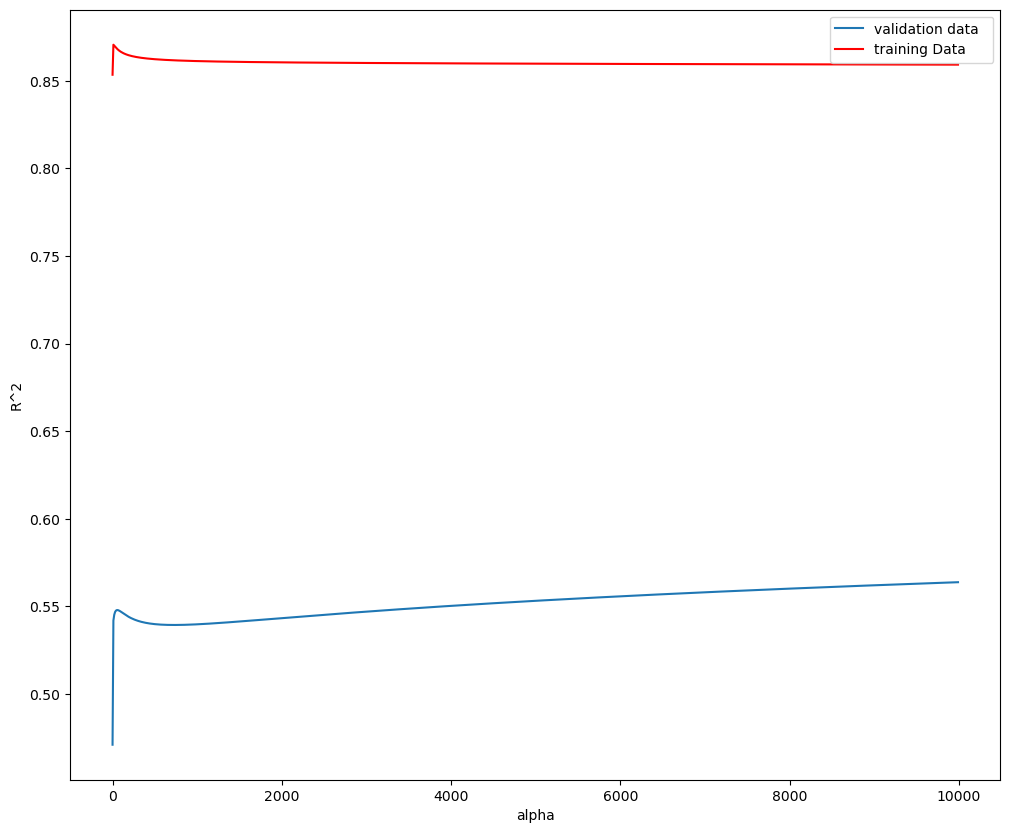

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [60]:
RidgeModel=Ridge(alpha=10)
RidgeModel.fit(x_train_pr,y_train)
RidgeModel.score(x_test_pr,y_test)

0.5418576440207269

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [63]:
RR=Ridge()
RR

Ridge()

In [75]:
Grid1=GridSearchCV(RR,parameters1,cv=4)

In [76]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [77]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [78]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [79]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Ridge(alpha=0.1, normalize=True)